In [80]:
import pandas as pd
from pathlib import Path
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import seaborn as sns
import os

In [81]:
if os.path.exists(f"Resources\\housing_price.db"):
    print("ok")
else:
    print("not ok")

conn = sqlite3.connect("Resources/housing_price.db")

#inspector = inspect(engine)
#session = Session(engine)

ok


In [82]:
table_name= "housing_price"
housing_price_df= pd.read_sql_table(table_name, con=engine)
housing_price_df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,58796.0,for_sale,169900,2.0,2.0,NaN,1194249.0,Agawam,Massachusetts,1001.0,892.0,4/30/2019
1,8147.0,for_sale,242000,2.0,2.0,NaN,913299.0,Agawam,Massachusetts,1001.0,1428.0,None
2,22700.0,for_sale,299950,2.0,2.0,NaN,560791.0,Agawam,Massachusetts,1001.0,1659.0,None
3,22700.0,for_sale,239900,3.0,1.0,0.46,849166.0,Agawam,Massachusetts,1001.0,1196.0,None
4,21163.0,for_sale,525000,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,6/25/2014
...,...,...,...,...,...,...,...,...,...,...,...,...
257783,51500.0,for_sale,135000,2.0,1.0,0.20,1347169.0,Ellwood City,Pennsylvania,16117.0,672.0,10/21/2019
257784,83590.0,for_sale,145000,2.0,2.0,0.17,539528.0,Aliquippa,Pennsylvania,15001.0,NaN,11/27/2019
257785,72202.0,for_sale,428900,4.0,3.0,7.10,1435095.0,Ellwood City,Pennsylvania,16117.0,NaN,None
257786,13045.0,for_sale,300000,NaN,NaN,0.14,1762223.0,Beaver,Pennsylvania,15009.0,NaN,None


In [71]:
housing_price_df = housing_price_df.drop (housing_price_df.index[0])
housing_price_df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
2,22700.0,for_sale,299950,2.0,2.0,NaN,560791.0,Agawam,Massachusetts,1001.0,1659.0,None
3,22700.0,for_sale,239900,3.0,1.0,0.46,849166.0,Agawam,Massachusetts,1001.0,1196.0,None
4,21163.0,for_sale,525000,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,6/25/2014
5,67455.0,for_sale,289900,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,10/12/2012
6,53016.0,for_sale,239900,2.0,3.0,NaN,384866.0,Agawam,Massachusetts,1001.0,1229.0,6/7/2016
...,...,...,...,...,...,...,...,...,...,...,...,...
257783,51500.0,for_sale,135000,2.0,1.0,0.20,1347169.0,Ellwood City,Pennsylvania,16117.0,672.0,10/21/2019
257784,83590.0,for_sale,145000,2.0,2.0,0.17,539528.0,Aliquippa,Pennsylvania,15001.0,NaN,11/27/2019
257785,72202.0,for_sale,428900,4.0,3.0,7.10,1435095.0,Ellwood City,Pennsylvania,16117.0,NaN,None
257786,13045.0,for_sale,300000,NaN,NaN,0.14,1762223.0,Beaver,Pennsylvania,15009.0,NaN,None


In [72]:
housing_price_df.count()

brokered_by       257649
status            257786
price             257786
bed               207133
bath              204829
acre_lot          202128
street            256521
city              257762
state             257786
zip_code          257756
house_size        178921
prev_sold_date    134520
dtype: int64

In [73]:
housing_price_df = housing_price_df.drop_duplicates ()
housing_price_df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
2,22700.0,for_sale,299950,2.0,2.0,NaN,560791.0,Agawam,Massachusetts,1001.0,1659.0,None
3,22700.0,for_sale,239900,3.0,1.0,0.46,849166.0,Agawam,Massachusetts,1001.0,1196.0,None
4,21163.0,for_sale,525000,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,6/25/2014
5,67455.0,for_sale,289900,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,10/12/2012
6,53016.0,for_sale,239900,2.0,3.0,NaN,384866.0,Agawam,Massachusetts,1001.0,1229.0,6/7/2016
...,...,...,...,...,...,...,...,...,...,...,...,...
257783,51500.0,for_sale,135000,2.0,1.0,0.20,1347169.0,Ellwood City,Pennsylvania,16117.0,672.0,10/21/2019
257784,83590.0,for_sale,145000,2.0,2.0,0.17,539528.0,Aliquippa,Pennsylvania,15001.0,NaN,11/27/2019
257785,72202.0,for_sale,428900,4.0,3.0,7.10,1435095.0,Ellwood City,Pennsylvania,16117.0,NaN,None
257786,13045.0,for_sale,300000,NaN,NaN,0.14,1762223.0,Beaver,Pennsylvania,15009.0,NaN,None


In [74]:
housing_price_df = housing_price_df.dropna()
housing_price_df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
4,21163.0,for_sale,525000,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,6/25/2014
5,67455.0,for_sale,289900,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,10/12/2012
11,97400.0,for_sale,384900,3.0,2.0,0.46,1244899.0,Agawam,Massachusetts,1001.0,1476.0,11/20/1986
16,33714.0,for_sale,199999,3.0,2.0,1.76,1745924.0,Agawam,Massachusetts,1001.0,1968.0,9/19/2008
22,22188.0,for_sale,419000,4.0,2.0,2.00,1417448.0,Agawam,Massachusetts,1002.0,1607.0,7/25/2005
...,...,...,...,...,...,...,...,...,...,...,...,...
257775,10642.0,for_sale,169900,3.0,1.0,0.07,1227262.0,Rochester,Pennsylvania,15074.0,1406.0,2/3/2022
257777,16829.0,for_sale,415000,3.0,4.0,0.47,743776.0,Coraopolis,Pennsylvania,15108.0,2750.0,8/13/2020
257781,22611.0,for_sale,95000,3.0,1.0,0.07,1120189.0,Rochester,Pennsylvania,15074.0,1440.0,5/6/2020
257782,83590.0,for_sale,179900,4.0,2.0,0.18,1607723.0,Ellwood City,Pennsylvania,16117.0,1970.0,3/23/2021


In [75]:
housing_price_df.count()

brokered_by       86633
status            86633
price             86633
bed               86633
bath              86633
acre_lot          86633
street            86633
city              86633
state             86633
zip_code          86633
house_size        86633
prev_sold_date    86633
dtype: int64

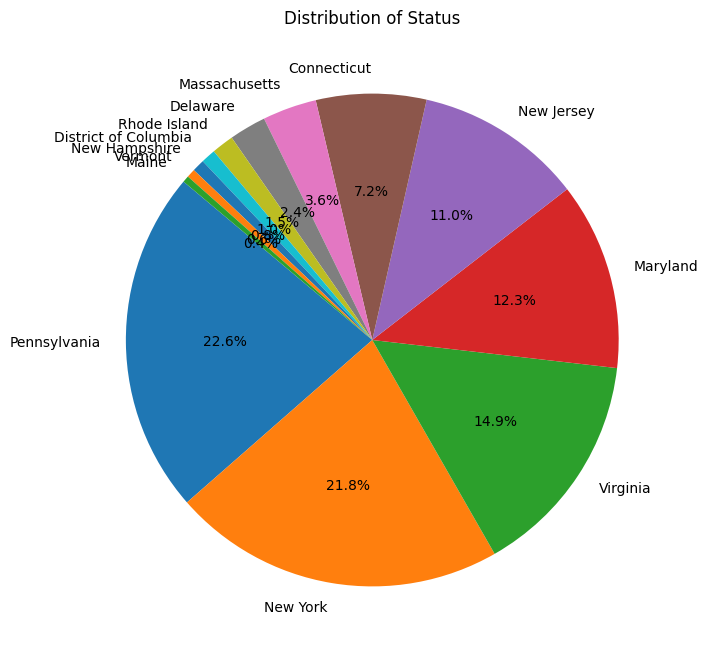

In [76]:
status_counts = housing_price_df['state'].value_counts()

plt.figure(figsize=(8, 8))  # Adjust figure size
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Status')

plt.show()

C:\Users\jilyayeva\AppData\Local\Temp\ipykernel_27776\1272473876.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = housing_price_df, x = 'state', palette='viridis',


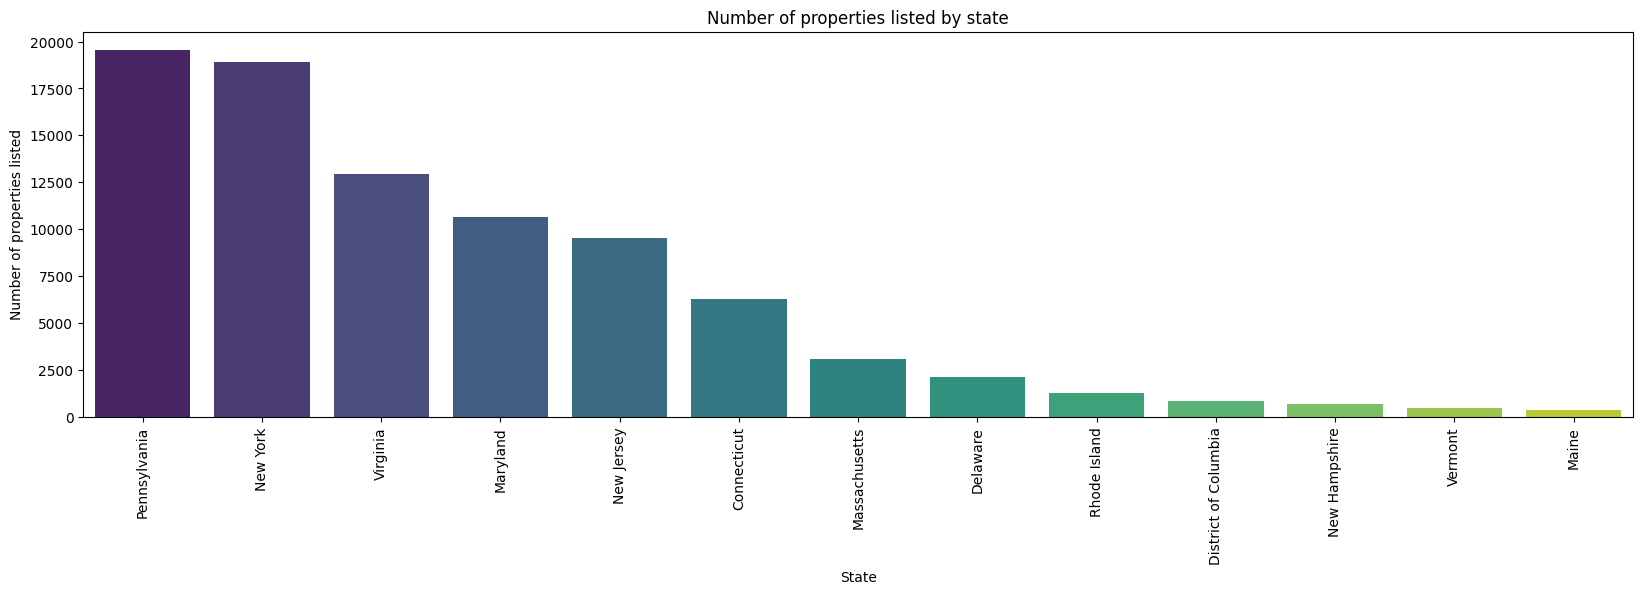

In [77]:
plt.figure(figsize=(20,5))
sns.countplot(data = housing_price_df, x = 'state', palette='viridis', 
              order = housing_price_df['state'].value_counts(ascending= False).index)
plt.title('Number of properties listed by state')
plt.xlabel('State')
plt.ylabel('Number of properties listed')
plt.xticks(rotation=90)
plt.show()

In [78]:
housing_price_df.dtypes



brokered_by       float64
status             object
price               int64
bed               float64
bath              float64
acre_lot          float64
street            float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
dtype: object

In [79]:
housing_price_df ['price'].astype(int)
housing_price_df.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
4,21163.0,for_sale,525000,3.0,3.0,0.45,1813270.0,Agawam,Massachusetts,1001.0,2314.0,6/25/2014
5,67455.0,for_sale,289900,3.0,2.0,0.36,1698080.0,Agawam,Massachusetts,1001.0,1276.0,10/12/2012
11,97400.0,for_sale,384900,3.0,2.0,0.46,1244899.0,Agawam,Massachusetts,1001.0,1476.0,11/20/1986
16,33714.0,for_sale,199999,3.0,2.0,1.76,1745924.0,Agawam,Massachusetts,1001.0,1968.0,9/19/2008
22,22188.0,for_sale,419000,4.0,2.0,2.00,1417448.0,Agawam,Massachusetts,1002.0,1607.0,7/25/2005


In [47]:
housing_price_df['price'] = pd.to_numeric(housing_price_df['price'], errors='coerce')
median_price = housing_price_df['price'].median()
print("Median price:", median_price)

Median price: 379900.0


C:\Users\Owner\AppData\Local\Temp\ipykernel_27140\20504697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_price_df['price'] = pd.to_numeric(housing_price_df['price'], errors='coerce')


C:\Users\Owner\AppData\Local\Temp\ipykernel_27140\614430126.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_state_price.index, y=df_state_price.values, palette='viridis')


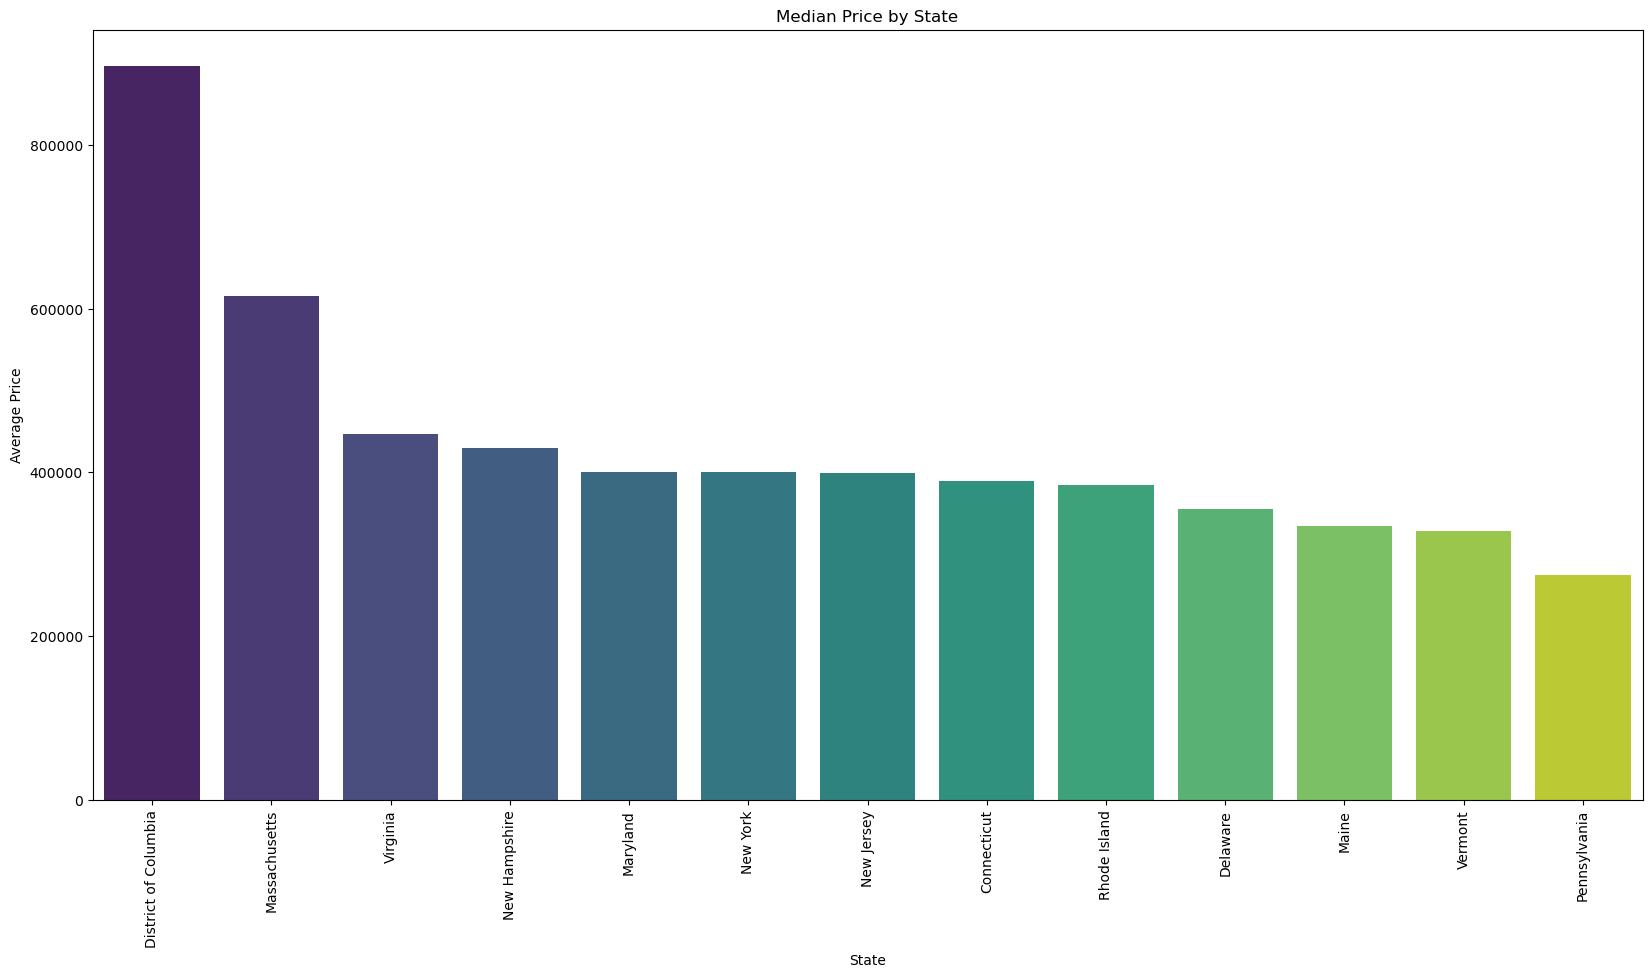

In [48]:
df_state_price = housing_price_df.groupby('state')['price'].median().sort_values(ascending = False)

plt.figure(figsize=(20, 10))
sns.barplot(x=df_state_price.index, y=df_state_price.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Median Price by State')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.show()

In [49]:
housing_price_df['house_size'] = pd.to_numeric(housing_price_df['price'], errors='coerce')

C:\Users\Owner\AppData\Local\Temp\ipykernel_27140\2062662466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_price_df['house_size'] = pd.to_numeric(housing_price_df['price'], errors='coerce')


C:\Users\Owner\AppData\Local\Temp\ipykernel_27140\2002212178.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_state_price.index, y=df_state_price.values, palette='viridis')


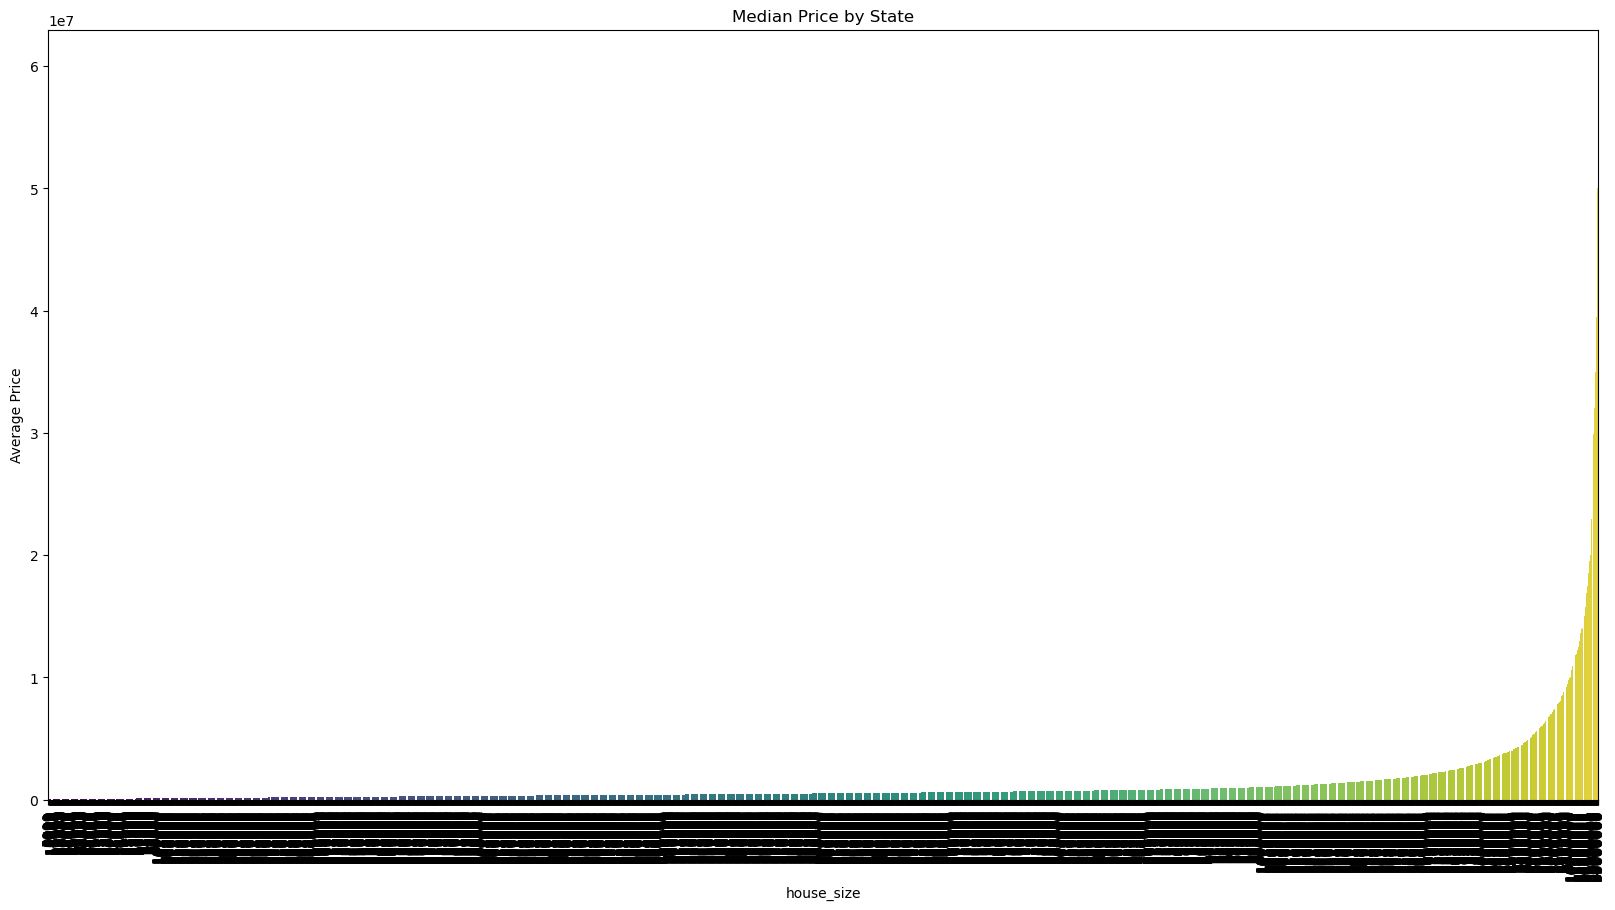

In [50]:
df_state_price = housing_price_df.groupby('house_size')['price'].median().sort_values(ascending = False)

plt.figure(figsize=(20, 10))
sns.barplot(x=df_state_price.index, y=df_state_price.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Median Price by State')
plt.xlabel('house_size')
plt.ylabel('Average Price')
plt.show()

In [4]:
plt.figure(figsize=(14,8))
sns.boxplot(x='state',y='bed',data=housing_price_df,palette='coolwarm')

plt.title('Bedroom per State', fontsize =16)
plt.xlabel('state', fontsize =16)
plt.ylabel('Bedrooms', fontsize =16)
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

NameError: name 'plt' is not defined